# E-Commerce Churn

The dataset belongs to a leading online e-commerce company. An online retail (E-commerce) company wants to know which customers are about to churn, so they can approach customers to offer some offers

Inspiration, some possible insights could be -

- What variables are contributing to customer churn?
- Who are the customers more likely to churn?
- What actions can be taken to stop them from leaving?

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from matplotlib.pyplot import rcParams
warnings.filterwarnings('ignore')

In [219]:
rcParams['axes.grid']         = True
rcParams['grid.alpha']        = 0.3
rcParams['axes.spines.right'] = False
rcParams['axes.spines.left']  = False
rcParams['axes.spines.top']   = False
rcParams['figure.figsize']    = (17,5)

In [197]:
pd.set_option('display.max_columns',100)
plt.rc('axes',axisbelow=True)

In [198]:
df = pd.read_excel('D:/Data/UCI/Churn/Churn_ECommerce.xlsx',sheet_name='E Comm',engine='openpyxl')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3472,53473,0,4.0,Mobile Phone,1,27.0,UPI,Male,3.0,4,Laptop & Accessory,5,Divorced,2,0,16.0,2.0,2.0,NaN,224.57
236,50237,0,NaN,Phone,1,16.0,Debit Card,Female,2.0,2,Mobile,3,Divorced,4,1,13.0,0.0,1.0,7.0,122.13
2002,52003,0,2.0,Phone,1,NaN,CC,Female,3.0,4,Mobile,1,Married,7,0,14.0,1.0,1.0,3.0,125.32
1244,51245,1,0.0,Mobile Phone,3,19.0,E wallet,Female,2.0,3,Laptop & Accessory,3,Single,4,1,11.0,2.0,2.0,2.0,198.54
4480,54481,0,1.0,Mobile Phone,3,9.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Single,3,1,12.0,1.0,2.0,5.0,169.78


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

- 20 columns with 5630 rows
- Missing values appear in some features
- Seems like all data types are already correct

**Desriptive statistics** numerical data

In [200]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


**Desriptive statistics** categorical data

In [201]:
df.select_dtypes('object').describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


# Data preparation

## Handling missing values

In [202]:
feature_na = df.isna().sum().sort_values(ascending=False).to_frame().rename({0:'Missing values'},axis=1)
feature_na = feature_na[feature_na['Missing values']!=0]
feature_na['percentage(%)'] = round(feature_na['Missing values']/df.shape[0],4)*100
feature_na['data type'] = df[feature_na.index.tolist()].dtypes.values
feature_na

,Missing values,percentage(%),data type
DaySinceLastOrder,307,5.45,float64
OrderAmountHikeFromlastYear,265,4.71,float64
Tenure,264,4.69,float64
OrderCount,258,4.58,float64
CouponUsed,256,4.55,float64
HourSpendOnApp,255,4.53,float64
WarehouseToHome,251,4.46,float64


There are **7 features** which have missing values and all the percentages are **below 6%**

Since the data type of all features are **float**, whether using **mean** or **median** for filling NaN, we will first examine the outliers of each feature

## Outliers of each feature above

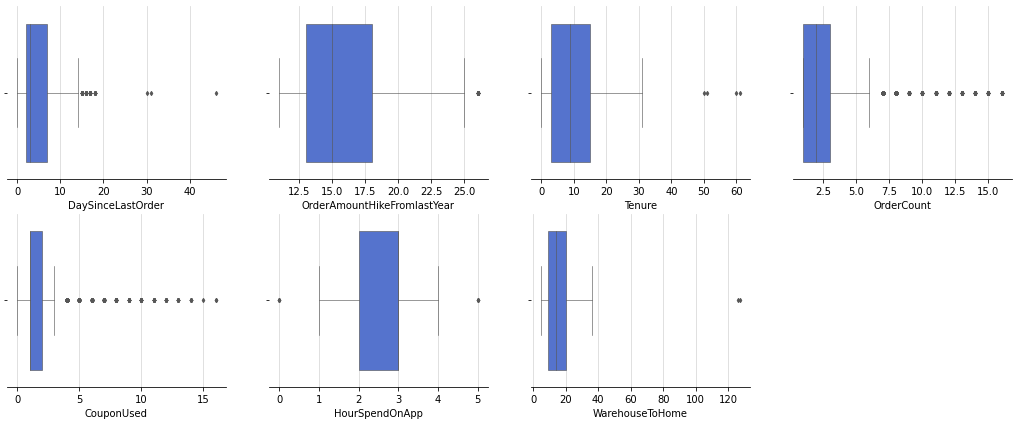

In [220]:
col_na = feature_na.index.tolist()

plt.figure(figsize=(18,7))
for i in range(len(feature_na.index)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df[col_na[i]],fliersize=3,linewidth=0.6,color='royalblue')

Lots of outliers appear in there. Thus, safer to use median for filling missing values

In [204]:
for col in df[col_na].columns:
    df.loc[df[col].isna(),col]=df[col].median()

In [205]:
df[col_na].isna().sum()

DaySinceLastOrder              0
OrderAmountHikeFromlastYear    0
Tenure                         0
OrderCount                     0
CouponUsed                     0
HourSpendOnApp                 0
WarehouseToHome                0
dtype: int64

## Duplicated data

In [206]:
df.duplicated().sum()

0

## Distribution numerical features

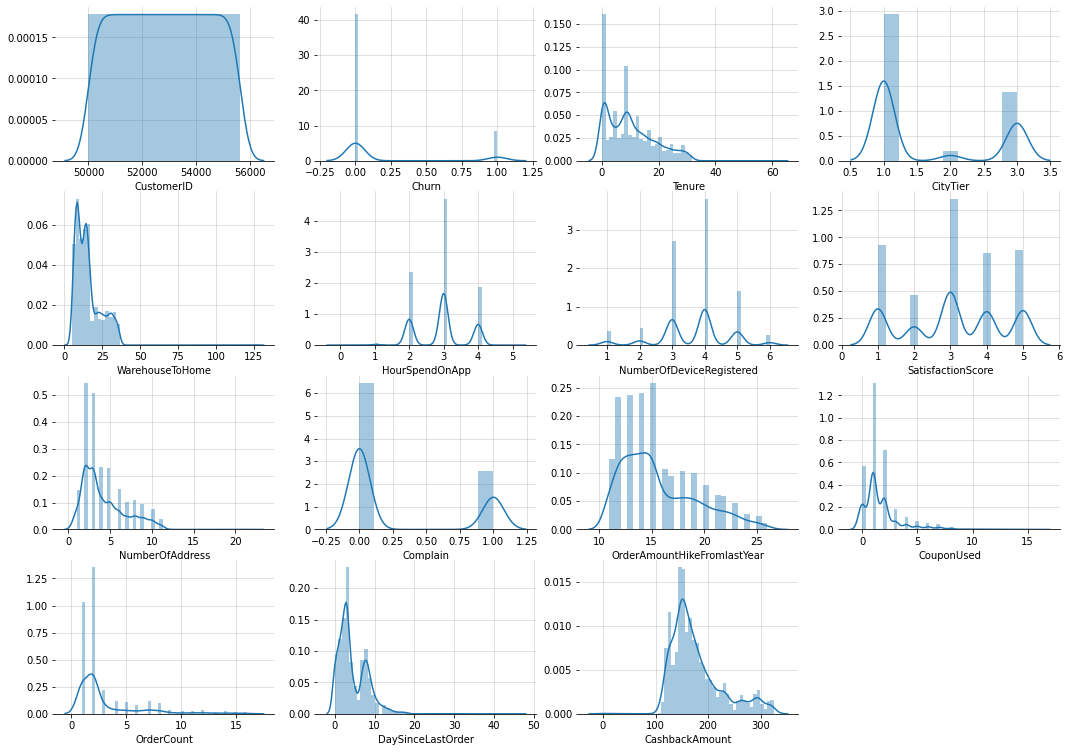

In [221]:
num_col = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(18,13))
for col in range(len(num_col)):
    plt.subplot(4,4,col+1)
    sns.distplot(df[num_col[col]])
    plt.ylabel('')

## Inconsistent data

Check whether the value has same meaning with others

In [208]:
for col1 in df.columns:
    if df[col1].nunique()<12:
        print(col1,':',df[col1].unique(),'\n')

Churn : [1 0] 

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer'] 

CityTier : [3 1 2] 

PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'] 

Gender : ['Female' 'Male'] 

HourSpendOnApp : [3. 2. 1. 0. 4. 5.] 

NumberOfDeviceRegistered : [3 4 5 2 1 6] 

PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] 

SatisfactionScore : [2 3 5 4 1] 

MaritalStatus : ['Single' 'Divorced' 'Married'] 

Complain : [1 0] 



In [209]:
df.replace({'PreferredLoginDevice':{'Phone':'Mobile Phone'},
            'PreferredPaymentMode':{'CC':'Credit Card',
                                    'Cash on Delivery':'COD'},
            'PreferredOrderCat'   :{'Mobile':'Mobile Phone'}
           },inplace=True)

## Handling outliers

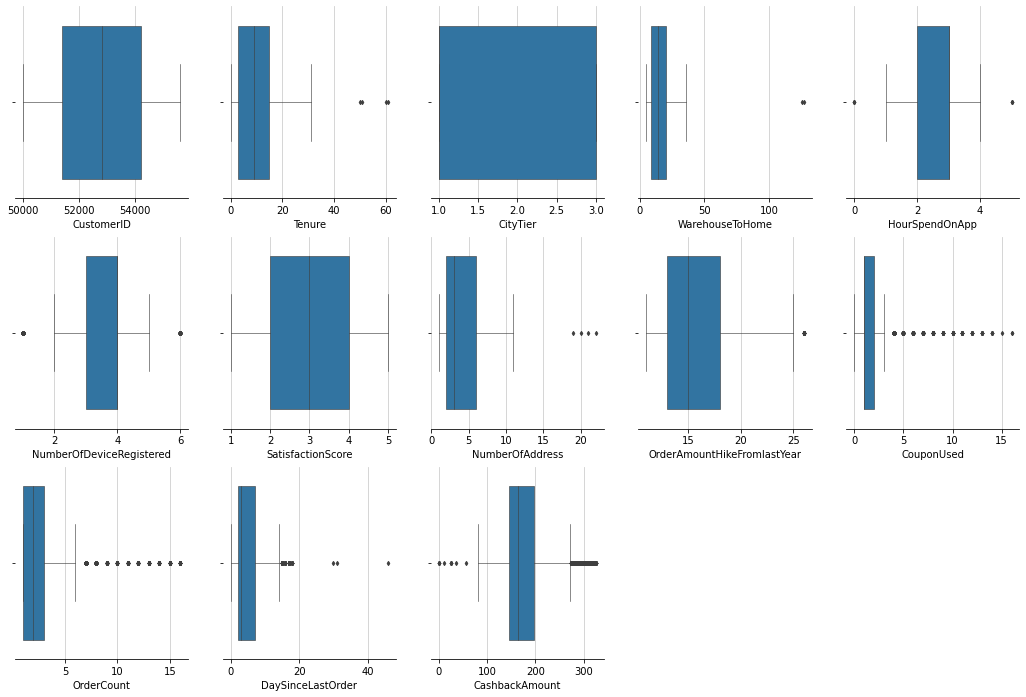

In [210]:
num_features = (df.select_dtypes('number').nunique()>2).sort_values()[2:].index.tolist()

plt.figure(figsize=(18,12))
for col in range(len(num_features)):
    plt.subplot(3,5,col+1)
    sns.boxplot(df[num_features[col]],fliersize=3,linewidth=0.6)

use z-score to reduce outliers and then remove some values manually if needed

In [211]:
z  = np.abs(stats.zscore(df[num_features]))
df_new = df[(z<3).all(axis=1)]

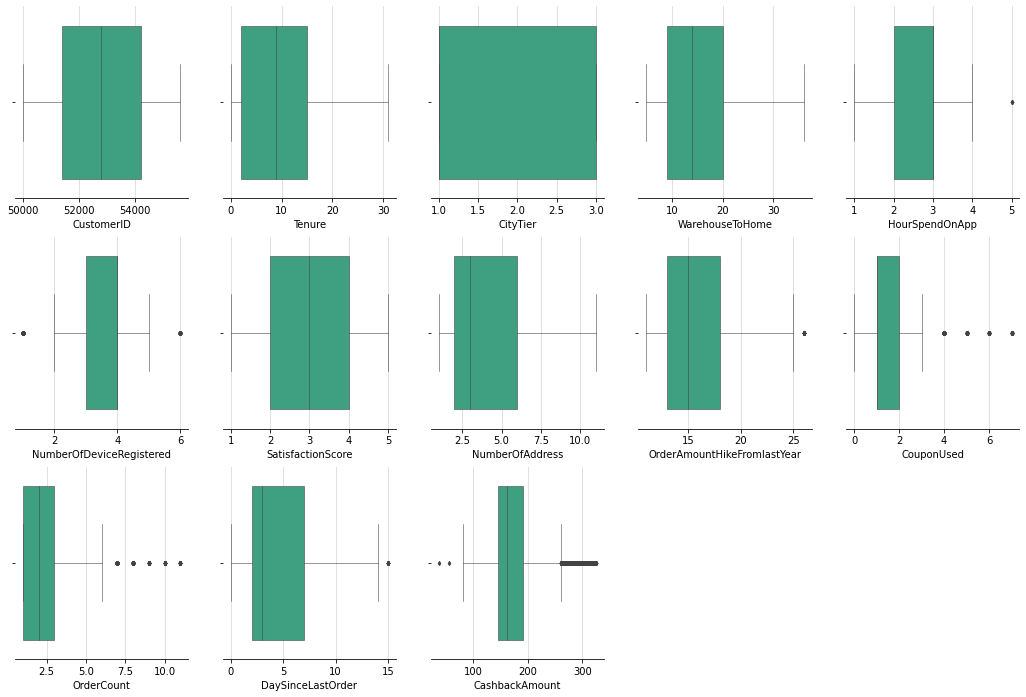

In [223]:
plt.figure(figsize=(18,12))
for col in range(len(num_features)):
    plt.subplot(3,5,col+1)
    sns.boxplot(df_new[num_features[col]],fliersize=3,linewidth=0.55,color='#2eb086')

In [213]:
print('Before remove outliers: {} '.format(df.shape[0]))
print('After remove outliers : {} '.format(df_new.shape[0]))

Before remove outliers: 5630 
After remove outliers : 5350 


After removing outliers, there are only 280 data removed. New dataset still contains 95% information, thus we can jump into the next process

# Exploratory Data Analysis

## Proportion of customer churn

In [214]:
churn = df_new['Churn'].value_counts().to_frame()
churn['percentage'] = round(churn['Churn']/churn['Churn'].sum()*100,2)
churn.index = ['No','Yes']

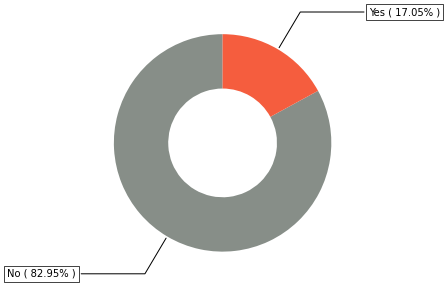

In [215]:
fig,ax = plt.subplots()
wedges, texts = ax.pie(churn.Churn,colors=['#878E88','#F55D3E'], startangle=90,wedgeprops=dict(width=0.5))
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(churn.index[i] + " ( " + str(round(churn.percentage[i], 2)) + "% )", xy=(x, y), 
                xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)

**17.05% of customers** in this data are churned

## Univariate Analysis

Define function

In [287]:
def uni_analysis_cat(feature):
    count     = df_new[feature].value_counts()
    pct_count = df_new[feature].value_counts(normalize=True)
    df_count  = pd.DataFrame({feature:count.index,
                              'Count':count.values,
                              'Percentage':round(pct_count*100,2)                              
                              })
    
    
    # Calculate the percentage of customer churned per category
    cat_pct               = df_new[df_new.Churn==1][feature].value_counts().to_frame()
    cat_pct['percentage'] = round(cat_pct[feature]/df_new[feature].value_counts()*100,2)
    cat_pct.reset_index(inplace=True)
    
    fig, ax = plt.subplots(1,2,figsize=(17,6))
    
    sns.countplot(feature, data=df_new, ax=ax[0], hue='Churn', palette = ['lightgrey','#F55D3E'])
    ax[0].set_title(feature+'\n', fontsize = 15, fontweight = 550)
    ax[0].legend(['Not churn', 'Churn'])
    ax[0].set_yticks(df_new.groupby(['Churn',feature]).count()['Tenure'].values)
    ax[0].set_ylabel('')
    
    sns.barplot('index', 'percentage',data=cat_pct, ax=ax[1],color='#F55D3E')
    ax[1].set_title('% Churn rate by '+feature+'\n', fontsize= 16, fontweight=550)
    ax[1].set_ylabel('Churn percentage')
    for x, y in zip(range(len(cat_pct['index'])), cat_pct.percentage.sort_values()):
        ax[1].text(x-0.13, y+0.4, str(y)+'%', fontsize=10, color='#F55D3E', fontweight=550)
    
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    return df_count
    
def uni_analysis_num(feature,bins='auto'):
    sns.histplot(df_new[df_new['Churn']==1][feature], label='Churn', color='#F55D3E',kde=True, edgecolor='#F55D3E',bins=bins)
    sns.histplot(df_new[df_new['Churn']==0][feature], label='No churn', color='tab:grey', kde=True,edgecolor='lightgrey',bins=bins)
    
    plt.legend()
    plt.title(feature+' by Customer churn',fontsize=16, fontweight=550)
    plt.ylabel('')
    
    plt.rc('axes',axisbelow=True)
    plt.grid(False)
    plt.grid(axis='y',alpha=0.3)
    plt.show()

### Device customer

Mobile phone and computer

,PreferredLoginDevice,Count,Percentage
Mobile Phone,Mobile Phone,3803,71.08
Computer,Computer,1547,28.92


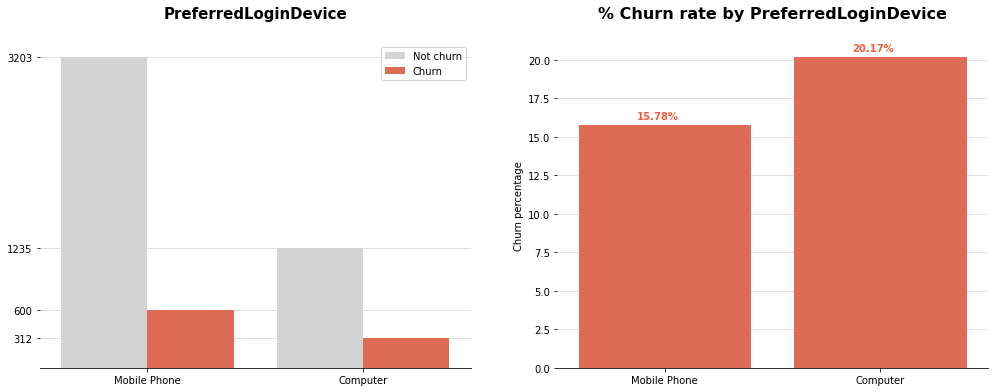

In [288]:
uni_analysis_cat('PreferredLoginDevice')

The graph on the right shows us a number of customer churn per total customer each feature category 

- Mostly, the customer uses **Mobile Phone** for making transactions
- Even though Mobile Phone is the most, customers who use **Computer** are more likely to **churn**

### City level

,CityTier,Count,Percentage
1,1,3485,65.14
3,3,1627,30.41
2,2,238,4.45


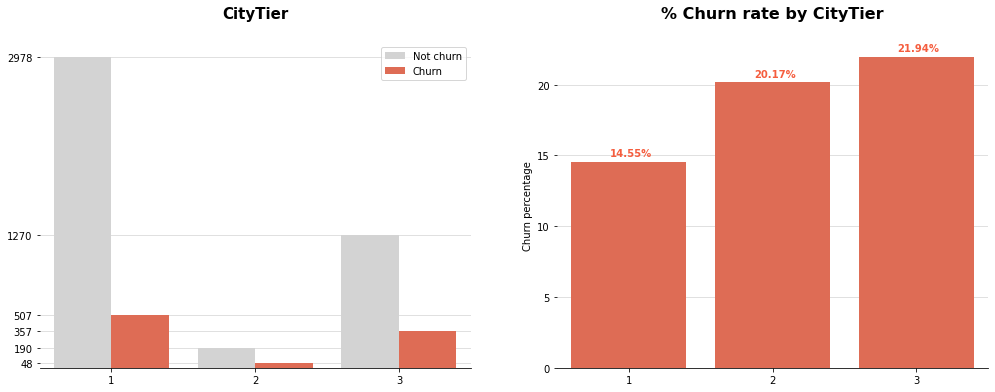

In [289]:
uni_analysis_cat('CityTier')